# TP4 LA CORRUPTION DES FONCTIONNAIRES

# Explorer un corpus

## Imports

In [21]:
from collections import defaultdict
import os

import matplotlib.pyplot as plt
import numpy as np

## Compter le nombre de documents dans le corpus

In [22]:
path = "../data/txt4/"
files = sorted(os.listdir(path))
len(files)

1000

## Explorer les noms de fichier

Nous allons manipuler ici les chaines de caractères.

Il s'agit de la classe `str` en Python.

Pour en savoir plus : https://openclassrooms.com/fr/courses/235344-apprenez-a-programmer-en-python/231888-creez-votre-premier-objet-les-chaines-de-caracteres

In [23]:
chaine = 'KB_JB838_1887-12-22_01-00001'
type(chaine)

str

In [24]:
# la méthode split
chaine_split = chaine.split('_')
chaine_split

['KB', 'JB838', '1887-12-22', '01-00001']

In [25]:
# Accéder à la date
date = chaine_split[2]

# Accéder à l'année
date_split = date.split('-')
year = date_split[0]

In [26]:
# Manipuler les str pour convertir une année en décennie
year[:3]

'188'

In [27]:
year[-1]

'7'

In [28]:
year[:3] + '0s'

'1880s'

## Quelques statistiques

In [29]:
all_years = [str(year) for year in range(1887, 1970)]

In [30]:
count_decade = defaultdict(int)
count_month = defaultdict(int)
count_newspapers = defaultdict(int)
covered_years = set()

for f in files:
    if "_" in f and f.endswith("txt"):
        elems = f.split("_")
        
        newspaper = elems[1]
        
        year = elems[2].split("-")[0]
        covered_years.add(year)
        decade = year[:3] + "0s"
        
        month = int(elems[2].split("-")[1])
        
        count_decade[decade] += 1
        count_newspapers[newspaper] += 1
        count_month[month] += 1
    else:
        print(f"Anomalous file: {f}")

In [34]:
print(f"Il y a {count_newspapers['JB838']} exemplaires du journal Le Soir, {count_newspapers['JB427']} exemplaires de La Libre Belgique, {count_newspapers['JB555']} exemplaires de LIndépendance belge,{count_newspapers['JB555A']} exemplaires deIndépendance belge (édité en Angleterre),{count_newspapers['JB567']} exemplaires du Journal de Bruxelles,{count_newspapers['JB572']} exemplaires du Journal de Charleroi,{count_newspapers['JB638']} exemplaires de La Meuse, {count_newspapers['JB685']} exemplaires du Petit Bleu, {count_newspapers['JB729']} exemplaires du Vingtième Siècle, {count_newspapers['JB773']} exemplaires de Vers lAvenir,{count_newspapers['JB837']} exemplaires de Le peuple, {count_newspapers['JB838773']} exemplaires de Le soir and {count_newspapers['JB729']} exemplaires de Le Drapeau rouge")
     

Il y a 120 exemplaires du journal Le Soir, 64 exemplaires de La Libre Belgique, 210 exemplaires de LIndépendance belge,3 exemplaires deIndépendance belge (édité en Angleterre),118 exemplaires du Journal de Bruxelles,86 exemplaires du Journal de Charleroi,68 exemplaires de La Meuse, 15 exemplaires du Petit Bleu, 71 exemplaires du Vingtième Siècle, 29 exemplaires de Vers lAvenir,126 exemplaires de Le peuple, 0 exemplaires de Le soir and 71 exemplaires de Le Drapeau rouge


In [ ]:
missing_years = [y for y in all_years if y not in covered_years]
print(f"Années manquantes: {', '.join(missing_years)}")

Années manquantes: 1917, 1918, 1943


## Visualisation du nombre de journaux par mois

Ces visualisations sont obtenues avec la librairie Matplotlib.

Pour en savoir plus : https://openclassrooms.com/fr/courses/4452741-decouvrez-les-librairies-python-pour-la-data-science/4740942-maitrisez-les-possibilites-offertes-par-matplotlib.

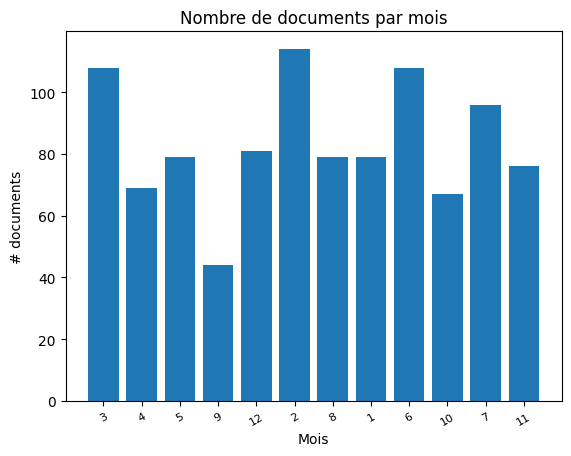

In [40]:
index = np.arange(len(count_month))
plt.bar(index, count_month.values())
plt.xlabel('Mois')
plt.ylabel('# documents')
plt.xticks(index, count_month.keys(), fontsize=8, rotation=30)
plt.title('Nombre de documents par mois')
plt.show()

## Imports

Pour utiliser ce notebook, vous devez préalablement récupérer les fichiers PDFs sur l'UV et les déposer dans le dossier `./data/pdf`


In [1]:
import os
import textract
from collections import defaultdict
import os
import matplotlib.pyplot as plt
import numpy as np

## Créer un repertoire txt4

In [2]:
txt_path = '../data/txt4'
if not os.path.exists(txt_path):
    os.mkdir(txt_path)

## Lister les fichiers dans `data/txt4`

In [3]:
txts = []
for f in os.listdir(txt_path):
    if os.path.isfile(os.path.join(txt_path, f)):
        txts.append(f)
txts[:10]

['KB_JB1051_1924-03-11_01-00002.txt',
 'KB_JB1051_1924-04-18_01-00003.txt',
 'KB_JB1051_1924-04-26_01-00001.txt',
 'KB_JB1051_1924-05-31_01-00001.txt',
 'KB_JB1051_1924-09-07_01-00003.txt',
 'KB_JB1051_1924-12-07_01-00002.txt',
 'KB_JB1051_1925-02-12_01-00001.txt',
 'KB_JB1051_1925-02-18_01-00003.txt',
 'KB_JB1051_1925-08-25_01-00001.txt',
 'KB_JB1051_1925-12-18_01-00001.txt']

## Créer un grand fichier 'corpus': commande bash

In [4]:
!cat ../data/txt/*.txt > ../data/all4.txt

## Compter le nombre de mots dans l'ensemble du corpus

In [6]:
!wc ../data/all4.txt

    70526  51521042 315035246 ../data/all4.txt


## Imports et dépendances Analyse de la distribution du vocabulaire

In [7]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Créer une une liste de stopwords

In [8]:
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout", 
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu"]
sw = set(sw)

In [9]:
print(f"{len(sw)} stopwords:\n {sorted(sw)}")

197 stopwords:
 ['ai', 'aie', 'aient', 'aies', 'ainsi', 'ait', 'après', 'as', 'au', 'aura', 'aurai', 'auraient', 'aurais', 'aurait', 'auras', 'aurez', 'auriez', 'aurions', 'aurons', 'auront', 'aussi', 'autre', 'autres', 'aux', 'avaient', 'avais', 'avait', 'avec', 'avez', 'aviez', 'avions', 'avoir', 'avons', 'ayant', 'ayante', 'ayantes', 'ayants', 'ayez', 'ayons', 'bien', 'c', 'ce', 'cela', 'celle', 'ces', 'cet', 'cette', 'comme', 'contre', 'd', 'dans', 'de', 'depuis', 'des', 'deux', 'dire', 'dit', 'doit', 'donc', 'dont', 'du', 'elle', 'en', 'encore', 'entre', 'es', 'est', 'et', 'eu', 'eue', 'eues', 'eurent', 'eus', 'eusse', 'eussent', 'eusses', 'eussiez', 'eussions', 'eut', 'eux', 'eûmes', 'eût', 'eûtes', 'faire', 'fait', 'faut', 'furent', 'fus', 'fusse', 'fussent', 'fusses', 'fussiez', 'fussions', 'fut', 'fûmes', 'fût', 'fûtes', 'het', 'il', 'ils', 'j', 'je', 'jusqu', 'l', 'la', 'le', 'les', 'leur', 'lui', 'm', 'ma', 'mais', 'me', 'mes', 'moi', 'moins', 'mon', 'même', 'n', 'ne', 'non'

## Tokeniser

In [10]:
# Récupération du contenu du fichier
path = "../data/all4.txt"
limit = 10**8

with open(path, 'r', encoding='utf-8') as f:
    text = f.read()[:limit]

In [11]:
# Tokenization
words = nltk.wordpunct_tokenize(text)
print(f"{len(words)} words found")

25898639 words found


In [12]:
words[:10]

['m', '■', 'Mi', '-.......', 'nèfoiifoTAMM', '.', '13', '.', '50', ';']

## Calculer la taille du vocabulaire

In [ ]:
# Eliminer les stopwords et les termes non alphabétiques
kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
voc = set(kept)
print(f"{len(kept)} words kept ({len(voc)} different word forms)")

## Récupérer les mots les plus fréquents et en faire un plot

In [13]:
fdist = nltk.FreqDist(kept)
fdist.most_common(10)

[('rue', 108873),
 ('dem', 67205),
 ('bruxelles', 28150),
 ('ans', 26916),
 ('maison', 25788),
 ('rossel', 21737),
 ('louer', 21479),
 ('prix', 21439),
 ('fille', 20561),
 ('bon', 20492)]

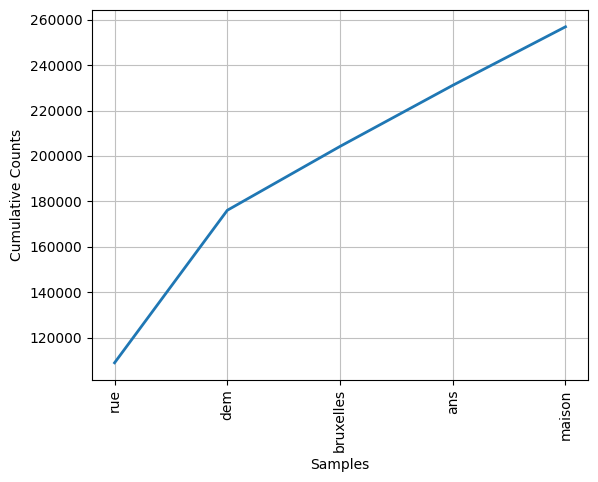

<AxesSubplot: xlabel='Samples', ylabel='Cumulative Counts'>

In [15]:
# Plot: les n mots les plus fréquents
n = 5
fdist.plot(n, cumulative=True)

## Détecter les Hapax (mots qui n'apparaissent qu'une fois dans le corpus)

In [18]:
fdist.hapaxes()[:10]

NameError: name 'fdist' is not defined

## Trouver les mots les plus longs du corpus

In [11]:
n = 30
sorted(voc, key=len, reverse=True)[:n]

['ïesâsssaseshshsekshfîhsashsasasasashsashsasssafiashsasasasasishshâeshshshsesasahasesbsasashsasasasasasssésasas',
 'bbqbbsbbaaababbbbbbaaababbbabbbboaflbflbbbbbbaaqaspbaabbababbabaabbbflbaaababbbbbabaabbbabnabbbbbbaaasbbb',
 'oaaadoqdaabaaaanaaaaanoqaaaaaaabdaaaaaaaaaaaaaodaqoaaaadonaaaoaaaaobondaonaaaoqaoooanabaoaaaaaaaaaaaaa',
 'mêêmmmmmmmmmmmamrnmêmimmmimmêmamêkêimêmiiêiêèmêêèmimmmêmmmmmmmmmbmmêmibiemmiêmmêtmmumêmm',
 'wwwiwvwvwwwwwwwuwwvwvvywwvwwiwwwwwvvwwvwwvwvvwwwvuvwvwwwwwwwwwwwwwwwwww',
 'wftiiiijikfiaabmbagbawhsbbiagiiaaagauambasÿaasiibwaanibiiwai',
 'bbbbhbbbbsssbhbbbbbsbbhhgbhbshsggwwbbihbhlbbhhbbbëbbbbbkbbbi',
 'djutespiècasüéfôctaeusesuvréespardesdeatlstesinexpérimentés',
 'nâiïimimiâbnimbàisrmmmrbsmhsrrraamhbmmmhmabbmhrannmhbbti',
 'bbaesiagiimisataimgaiaegvbsasasawabamflasabiasbebbmabea',
 'mvmmmmimmwmaimsitvnmmmmmalîlnnwmmhmbmahilmnmambmgbm',
 'ksrntsrnêmêtmmmêêmmêitmmêêhiêmêmiêêêêêêaêmmaêmêêmm',
 'hsffiëhbhsshhsséhsséhbsssshséibshéëeÿshsshssshhsbï',
 'hswfswiiawwmpibb

## Extraire les mots clés d'un document avec Yake

In [13]:
import os
import yake

In [14]:
# Instantier l'extracteur de mots clés
kw_extractor = yake.KeywordExtractor(lan="fr", top=50)
kw_extractor

In [16]:
# Lister les Fichiers
data_path = "../data/txt4/"
files = os.listdir(data_path)

In [17]:
for f in sorted(files)[:15]:
    text = open(os.path.join(data_path, f), 'r', encoding="utf-8").read()
    keywords = kw_extractor.extract_keywords(text)
    kept = []
    for kw, score in keywords:
        words = kw.split()
        if len(words) == 2:
            kept.append(kw)
    print(f"{f} mentions these keywords: {', '.join(kept)}...")

KB_JB1051_1924-03-11_01-00002.txt mentions these keywords: los salaires, délégués ouvriers, dirigeants réformistes, patrons seulement, ouvriers mineurs, Pravo Lidu, mot d'ordre, los ouvriers, ouvriers Los, los patrons, patrons qu'ils...
KB_JB1051_1924-04-18_01-00003.txt mentions these keywords: gouvernement allemand, Parti communiste, gouvernement tchécoslovaque, gouvernements anglais, Ifc Commission, gouvernement travailliste, quo l'on...
KB_JB1051_1924-04-26_01-00001.txt mentions these keywords: CLASSES MOYENNES, Max Hoelz, Bruxelles ABONNEMENTS, Parti Communiste, LANGUE OFFICIELLE, bénéfice net, prolétariat allemand...
KB_JB1051_1924-05-31_01-00001.txt mentions these keywords: Parti Communiste, Parti socialiste, chefs réformistes, Mineurs allemands, ROUG Téléphone, Jeune bureaucratie, classe ouvrière, sentence arbitrale, partis politiques, MINEURS ANGLAIS, l'Internationale communiste...
KB_JB1051_1924-09-07_01-00003.txt mentions these keywords: plan Dawes, parti républicain, NOUVELL

## Imports et stopwords Nuages de mots

In [9]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "rossel", "dem"]
sw = set(sw)


## Créer un fichier contenant le texte de tous les journaux

In [11]:
# Lister les fichiers de cette année
data_path = '../data'
txt_path = '../data/txt4'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f))]
len(txts)

1000

In [19]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r', encoding='utf-8') as f:
        content_list.append(f.read())

In [20]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

1000

In [21]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][0:200]

"GREVE DES CARRIERS DE LIEUE m ENVIRONS Les carriers do Liège et environs, réunis en assemblée générale le samedi S, après avoir examiné la réponse patronal-* v « ce qui concerne l'augmentation de sala"

In [22]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'tp4.txt'), 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

In [23]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'tp4.txt'), 'r', encoding='utf-8') as f:
    before = f.read()

before[:500]

"GREVE DES CARRIERS DE LIEUE m ENVIRONS Les carriers do Liège et environs, réunis en assemblée générale le samedi S, après avoir examiné la réponse patronal-* v « ce qui concerne l'augmentation de salaire do 50 centimes à l'heure, ont «aonstaté qw ««■ dàe«A«i* ateliers, quatre patrons seulement ont accorde satisfaction. Les quatorze autres n'ont pas seulement refusé do donner l'augmentation, mais ils refusent do reconnaître lo syndicat. Sur ce, l'assemblée, a l'unanimité, A déclaré la grèvo pour "

## Nettoyer le fichier à l'aide d'une fonction de nettoyage

### Créer la fonction de nettoyage (à adapter)

In [24]:
def clean_text(folder=None):
    if folder is None:
        input_path = f"tp4.txt"
        output_path = f"tp4_clean.txt"
    else:
        input_path = f"{folder}/tp4.txt"
        output_path = f"{folder}/tp4_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, 'r', encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.upper() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

### Appliquer la fonction sur le fichier complet

In [25]:
clean_text(folder=temp_path)

'Output has been written in ../data/tmp/tp4_clean.txt!'

In [26]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'tp4_clean.txt'), 'r', encoding='utf-8') as f:
    after = f.read()

after[:500]

'GREVE CARRIERS LIEUE ENVIRONS CARRIERS LIÈGE ENVIRONS RÉUNIS ASSEMBLÉE GÉNÉRALE SAMEDI EXAMINÉ RÉPONSE PATRONAL CONCERNE AUGMENTATION SALAIRE CENTIMES HEURE AONSTATÉ DÀE ATELIERS QUATRE PATRONS SEULEMENT ACCORDE SATISFACTION QUATORZE SEULEMENT REFUSÉ DONNER AUGMENTATION REFUSENT RECONNAÎTRE SYNDICAT ASSEMBLÉE UNANIMITÉ DÉCLARÉ GRÈVO LUNDI MATIN MOUVEMENT CARRIERS TRÈS LIEU PARTI MALGRÉ QUO SYNDICAT DONNÉ ORDRE GRÈVE OUVRIERS QUITTÉ CHANTIERS CARRIERS VOLONTÉ VAINCRE ARROGANCE PATRONALE SAVENT LU'

## Nuage de mots

### Afficher les termes les plus fréquents


In [27]:
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('GOUVERNEMENT', 7848), ('MINISTRE', 6034), ('PAYS', 5214), ('CHAMBRE', 5210), ('LEURS', 5156), ('ANS', 4930), ('TRÈS', 4847), ('BRUXELLES', 4840), ('LOI', 4553), ('RUE', 4550)]


### Créer, stocker et afficher le nuage de mots

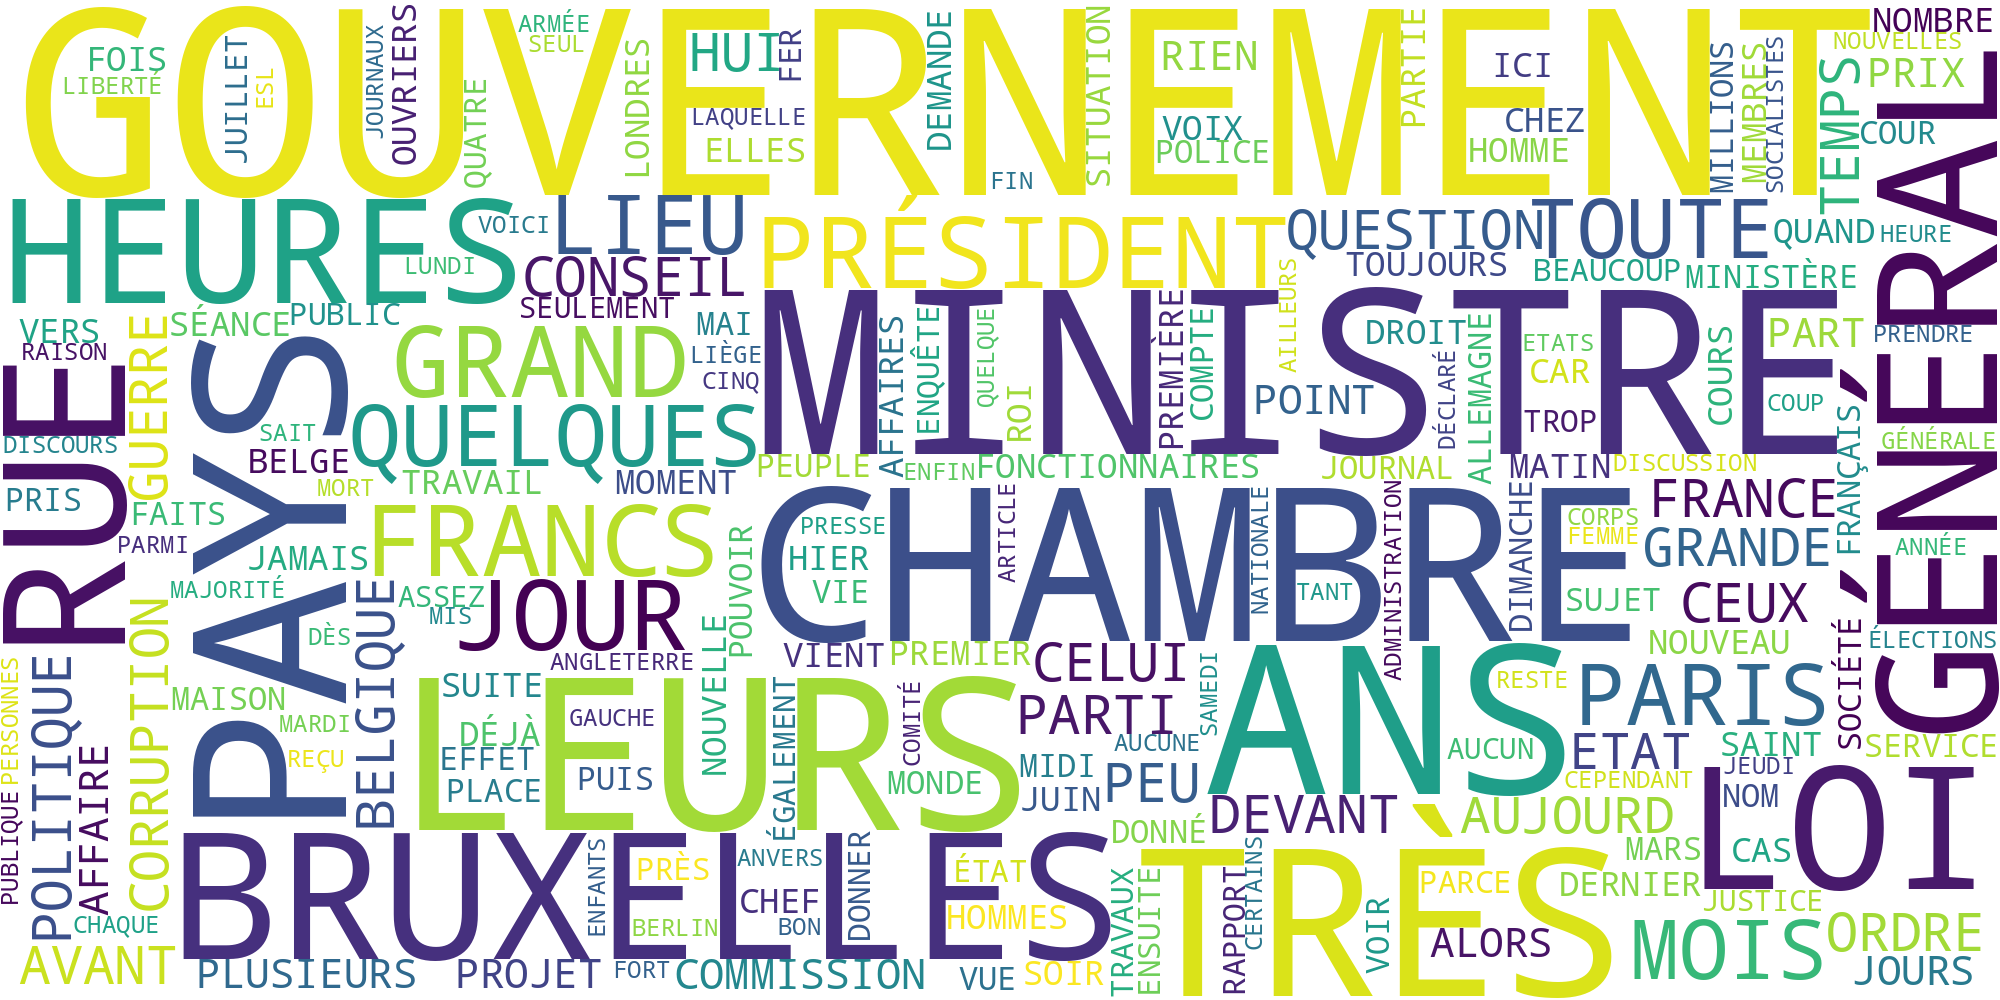

In [28]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"tp4.png"))
Image(filename=os.path.join(temp_path, f"tp4.png"))

# Reconnaissance d'entités nommées avec SpaCy

La documentation est accessible ici: https://spacy.io/api

## Imports les entités nommées

In [29]:
from collections import defaultdict
import sys
import spacy
from spacy.lang.fr.examples import sentences

In [30]:
nlp = spacy.load('fr_core_news_md')

## Appliquer la reconnaissance d'entités nommées sur notre corpus

In [31]:
# Charger le texte
n=100000
text = open("../data/all4.txt", encoding='utf-8').read()[:n]

In [32]:
%%time
# Traiter le texte

doc = nlp(text)

CPU times: user 10.4 s, sys: 0 ns, total: 10.4 s
Wall time: 11.4 s


In [33]:
# Compter les entités
people = defaultdict(int)
for ent in doc.ents:
    if ent.label_ == "PER" and len(ent.text) > 3:
        people[ent.text] += 1

In [34]:
# Trier et imprimer

sorted_people = sorted(people.items(), key=lambda kv: kv[1], reverse=True)

for person, freq in sorted_people[:50]:
    print(f"{person} apparait {freq} fois dans le corpus")

Verhaegen apparait 5 fois dans le corpus
Le roi apparait 5 fois dans le corpus
Tisza apparait 4 fois dans le corpus
Mme Loubet apparait 4 fois dans le corpus
Seigle apparait 3 fois dans le corpus
Jambon apparait 2 fois dans le corpus
Mme
Loubet apparait 2 fois dans le corpus
Pape apparait 2 fois dans le corpus
M. Loubet apparait 2 fois dans le corpus
JÊ%i apparait 1 fois dans le corpus
Jardins d’hiver.— Traitement apparait 1 fois dans le corpus
Naissances apparait 1 fois dans le corpus
MolenbeekVe apparait 1 fois dans le corpus
^IlHcnua-MyrK# apparait 1 fois dans le corpus
Agio ht apparait 1 fois dans le corpus
ef Pien apparait 1 fois dans le corpus
tor Paria apparait 1 fois dans le corpus
Mûlibran apparait 1 fois dans le corpus
Lennon apparait 1 fois dans le corpus
â fit-JosM-ton apparait 1 fois dans le corpus
Céréales apparait 1 fois dans le corpus
Dinaart apparait 1 fois dans le corpus
rue leyeaveM. fromeaé apparait 1 fois dans le corpus
Meyer apparait 1 fois dans le corpus
t laeatr

# Sentiment analysis 

## 1. Textblob-FR

Documentation: https://textblob.readthedocs.io/en/dev/

### Imports

In [1]:
import sys
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer

### Création d'une fonction `get_sentiment`

In [2]:
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())

def get_sentiment(input_text):
    blob = tb(input_text)
    polarity, subjectivity = blob.sentiment
    polarity_perc = f"{100*abs(polarity):.0f}"
    subjectivity_perc = f"{100*subjectivity:.0f}"
    if polarity > 0:
        polarity_str = f"{polarity_perc}% positive"
    elif polarity < 0:
        polarity_str = f"{polarity_perc}% negative"
    else:
        polarity_str = "neutral"
    if subjectivity > 0:
        subjectivity_str = f"{subjectivity}% subjective"
    else:
        subjectivity_str = "perfectly objective"
    print(f"This text is {polarity_str} and {subjectivity_str}.")

### Analyser le sentiment d'une phrase

In [3]:
get_sentiment("La corruption est le pire vice.")

This text is 40% negative and 0.8% subjective.


In [4]:
get_sentiment("Les fonctionnaires sont les personnes les plus devouées à leur travail !")

This text is 19% positive and 0.1% subjective.


## 2. Utilisation de transformers

Documentation: https://github.com/TheophileBlard/french-sentiment-analysis-with-bert

**!!** Si le code ne tourne pas sur votre machine, vous pouvez le tester directement sur Google Colab en utilisant [ce lien](https://colab.research.google.com/github/TheophileBlard/french-sentiment-analysis-with-bert/blob/master/colab/french_sentiment_analysis_with_bert.ipynb) **!!**

Le modèle peut également être testé en ligne sur [HuggingFace](https://huggingface.co/tblard/tf-allocine)

### Installation des librairies et imports

In [5]:
!pip install tensorflow
!pip install sentencepiece
!pip install transformers

from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
from transformers import pipeline

2022-12-19 19:10:40.049924: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-19 19:10:40.885769: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-19 19:10:40.885823: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-19 19:10:43.070715: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

### Chargement du modèle

In [6]:
tokenizer = AutoTokenizer.from_pretrained("tblard/tf-allocine", use_pt=True)
model = TFAutoModelForSequenceClassification.from_pretrained("tblard/tf-allocine")

sentiment_analyser = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

2022-12-19 19:10:47.160488: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-19 19:10:47.161067: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-19 19:10:47.161125: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (11a31e748c6b): /proc/driver/nvidia/version does not exist
2022-12-19 19:10:47.162723: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-19 19:10:47.594298: W tensorflow/tsl/framework/cpu_allocator_im

### Analyser le sentiment d'une phrase

In [7]:
sentiment_analyser("Tous les fonctionnaires sont corrompus.")

[{'label': 'NEGATIVE', 'score': 0.7833437919616699}]

In [9]:
sentiment_analyser(" Certains fonctionnaires ne sont pas corrompus.")

[{'label': 'POSITIVE', 'score': 0.5120738744735718}]

In [8]:
sentiment_analyser("La corruption n'existe pas!")

[{'label': 'POSITIVE', 'score': 0.653373122215271}]

In [11]:
sentiment_analyser("La corruption existera toujours")

[{'label': 'POSITIVE', 'score': 0.5927451848983765}]

# Clustering de documents

## Imports

In [1]:
import collections
import os
import string
import sys

import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine

In [2]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
data_path = "../data/txt4/"

## Charger tous les  fichiers de la décennie et en créer une liste de textes

In [4]:
files = [f for f in sorted(os.listdir(data_path))]

In [5]:
# Exemple de fichiers
files[:5]

['KB_JB1051_1924-03-11_01-00002.txt',
 'KB_JB1051_1924-04-18_01-00003.txt',
 'KB_JB1051_1924-04-26_01-00001.txt',
 'KB_JB1051_1924-05-31_01-00001.txt',
 'KB_JB1051_1924-09-07_01-00003.txt']

In [6]:
texts = [open(data_path + f, "r", encoding="utf-8").read() for f in files]

In [7]:
# Exemple de textes
texts[0][:400]

"GREVE DES CARRIERS DE LIEUE m ENVIRONS Les carriers do Liège et environs, réunis en assemblée générale le samedi S, après avoir examiné la réponse patronal-* v « ce qui concerne l'augmentation de salaire do 50 centimes à l'heure, ont «aonstaté qw ««■ dàe«A«i* ateliers, quatre patrons seulement ont accorde satisfaction. Les quatorze autres n'ont pas seulement refusé do donner l'augmentation, mais i"

## Vectoriser les documents à l'aide de TF-IDF

In [8]:
# Création d'une fonction de pré-traitement
def preprocessing(text, stem=True):
    """ Tokenize text and remove punctuation """
    text = text.translate(string.punctuation)
    tokens = word_tokenize(text)
    return tokens

### Instancier le modèle TF-IDF avec ses arguments

In [9]:
vectorizer = TfidfVectorizer(
    tokenizer=preprocessing,
    stop_words=stopwords.words('french'),
    max_df=0.5,
    min_df=0.1,
    lowercase=True)

### Construire la matrice de vecteurs à l'aide de la fonction `fit_transform`

In [10]:
tfidf_vectors = vectorizer.fit_transform(texts)

/usr/local/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [11]:
# Détail de la matrice
tfidf_vectors

<1000x3587 sparse matrix of type '<class 'numpy.float64'>'
	with 729936 stored elements in Compressed Sparse Row format>

### Imprimer le vecteur tf-IDF du premier document

In [12]:
pd.Series(
    tfidf_vectors[0].toarray()[0],
    index=vectorizer.get_feature_names_out()
    ).sort_values(ascending=False)

salaires    0.318867
patrons     0.297199
mineurs     0.217584
quo         0.161975
los         0.149326
              ...   
fera        0.000000
ferait      0.000000
ferme       0.000000
fermer      0.000000
♦           0.000000
Length: 3587, dtype: float64

## Comprendre les vecteurs et leurs "distances"

In [13]:
cosine([1, 2, 3], [1, 2, 3])

0

In [14]:
cosine([1, 2, 3], [1, 2, 2])

0.02004211298777725

In [15]:
cosine([1, 2, 3], [2, 2, 2])

0.07417990022744858

### Tests sur nos documents

In [16]:
tfidf_array = tfidf_vectors.toarray()

In [17]:
# Vecteur du document 0
tfidf_array[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [18]:
# Vecteur du document 1
tfidf_array[1]

array([0., 0., 0., ..., 0., 0., 0.])

In [19]:
cosine(tfidf_array[0], tfidf_array[1])

0.7867555163958345

## Appliquer un algorithme de clustering sur les vecteurs TF-IDF des documents

Pour en savoir plus sur le KMeans clustering :
- https://medium.com/dataseries/k-means-clustering-explained-visually-in-5-minutes-b900cc69d175

### Définir un nombre de clusters

In [20]:
N_CLUSTERS = 3

### Instancier le modèle K-Means et ses arguments

In [21]:
km_model = KMeans(n_clusters=N_CLUSTERS)

### Appliquer le clustering à l'aide de la fonction `fit_predict`

In [22]:
clusters = km_model.fit_predict(tfidf_vectors)

/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [23]:
clustering = collections.defaultdict(list)

for idx, label in enumerate(clusters):
    clustering[label].append(files[idx])

In [24]:
pprint(dict(clustering))

{0: ['KB_JB1051_1924-03-11_01-00002.txt',
     'KB_JB1051_1924-04-18_01-00003.txt',
     'KB_JB1051_1924-04-26_01-00001.txt',
     'KB_JB1051_1924-05-31_01-00001.txt',
     'KB_JB1051_1924-09-07_01-00003.txt',
     'KB_JB1051_1924-12-07_01-00002.txt',
     'KB_JB1051_1925-02-12_01-00001.txt',
     'KB_JB1051_1925-02-18_01-00003.txt',
     'KB_JB1051_1925-08-25_01-00001.txt',
     'KB_JB1051_1925-12-18_01-00001.txt',
     'KB_JB1051_1926-01-14_01-00003.txt',
     'KB_JB1051_1928-03-25_01-00002.txt',
     'KB_JB1051_1928-04-20_01-00003.txt',
     'KB_JB1051_1928-06-28_01-00001.txt',
     'KB_JB1051_1929-10-09_01-00001.txt',
     'KB_JB1051_1932-10-01_01-00001.txt',
     'KB_JB1051_1934-01-13_01-00003.txt',
     'KB_JB1051_1934-06-02_01-00003.txt',
     'KB_JB1051_1936-10-09_01-00001.txt',
     'KB_JB1051_1937-02-12_01-00002.txt',
     'KB_JB1051_1937-09-12_01-00008.txt',
     'KB_JB1051_1938-02-21_01-00002.txt',
     'KB_JB1051_1939-07-20_01-00001.txt',
     'KB_JB1051_1939-07-21_01-0000

## Visualiser les clusters

### Réduire les vecteurs à 2 dimensions à l'aide de l'algorithme PCA
Cette étape est nécessaire afin de visualiser les documents dans un espace 2D

https://fr.wikipedia.org/wiki/Analyse_en_composantes_principales

In [25]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())

In [26]:
reduced_vectors[:10]

array([[-0.13408983, -0.15468311],
       [-0.14579541, -0.05426757],
       [-0.12057246, -0.17300999],
       [-0.13929572, -0.2144053 ],
       [-0.14031156, -0.18289097],
       [-0.15482988, -0.07640164],
       [-0.13982438, -0.09338598],
       [-0.15425277, -0.03976542],
       [-0.12401104, -0.14774857],
       [-0.12501382, -0.14396929]])

### Générer le plot

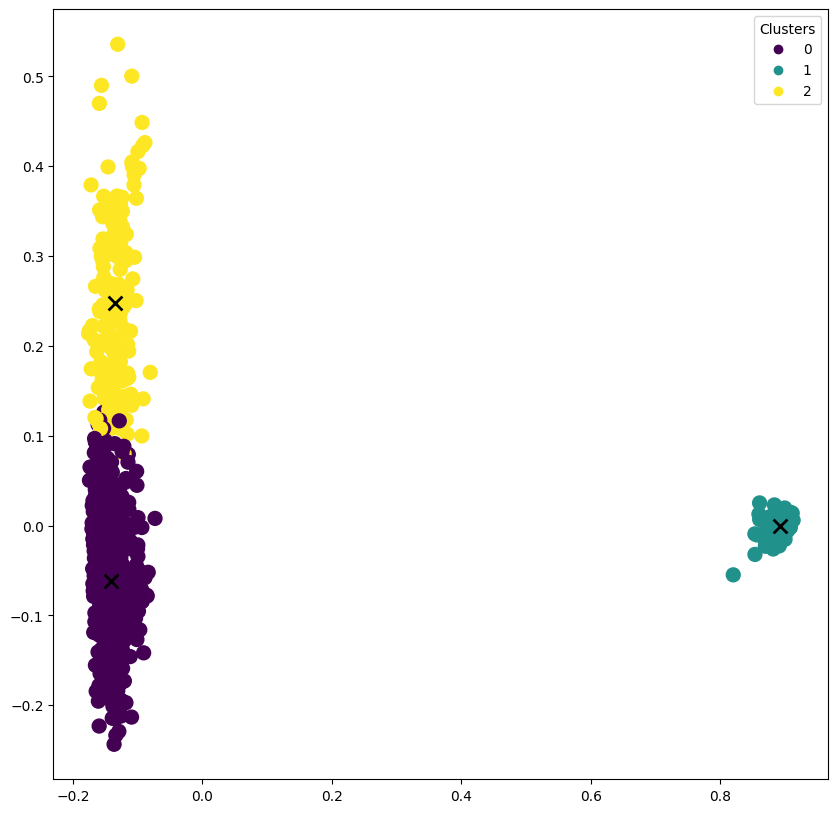

In [27]:
x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]

plt.figure(figsize=(10,10))
scatter = plt.scatter(x_axis, y_axis, s=100, c=clusters)

# Ajouter les centroïdes
centroids = pca.transform(km_model.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],  marker = "x", s=100, linewidths = 2, color='black')

# Ajouter la légende
plt.legend(handles=scatter.legend_elements()[0], labels=set(clusters), title="Clusters")

# Segmentation en phrases

## Imports

In [28]:
import os
import sys
import nltk
from nltk.tokenize import sent_tokenize

## Fichiers d'inputs et d'outputs

In [29]:
infile = "../data/all4.txt"
outfile = "../data/sents4.txt"

## Segmentation en phrases du corpus complet et création d'un nouveau fichier

**Important** : pour traiter le corpus complet, indiquez `LIMIT = None`

In [30]:
LIMIT = 1000000

In [31]:
with open(outfile, 'w', encoding="utf-8") as output:
    with open(infile, encoding="utf-8", errors="backslashreplace") as f:
        content = f.readlines()
        content = content[:LIMIT] if LIMIT is not None else content
        n_lines = len(content)
        for i, line in enumerate(content):
            if i % 100 == 0:
                print(f'processing line {i}/{n_lines}')
            sentences = sent_tokenize(line)
            for sent in sentences:
                output.write(sent + "\n")
print("Done")

processing line 0/70527
processing line 100/70527
processing line 200/70527
processing line 300/70527
processing line 400/70527
processing line 500/70527
processing line 600/70527
processing line 700/70527
processing line 800/70527
processing line 900/70527
processing line 1000/70527
processing line 1100/70527
processing line 1200/70527
processing line 1300/70527
processing line 1400/70527
processing line 1500/70527
processing line 1600/70527
processing line 1700/70527
processing line 1800/70527
processing line 1900/70527
processing line 2000/70527
processing line 2100/70527
processing line 2200/70527
processing line 2300/70527
processing line 2400/70527
processing line 2500/70527
processing line 2600/70527
processing line 2700/70527
processing line 2800/70527
processing line 2900/70527
processing line 3000/70527
processing line 3100/70527
processing line 3200/70527
processing line 3300/70527
processing line 3400/70527
processing line 3500/70527
processing line 3600/70527
processing li

# Word Embeddings : le modèle Word2Vec

## Imports

In [1]:
import sys

from gensim.models.phrases import Phrases, Phraser
from gensim.models import Word2Vec

import nltk
from nltk.tokenize import wordpunct_tokenize
from unidecode import unidecode

## Chargement et traitement des phrases du corpus

### Création d'un objet qui *streame* les lignes d'un fichier pour économiser de la RAM

In [2]:
class MySentences(object):
    """Tokenize and Lemmatize sentences"""
    def __init__(self, filename):
        self.filename = filename

    def __iter__(self):
        for line in open(self.filename, encoding='utf-8', errors="backslashreplace"):
            yield [unidecode(w.lower()) for w in wordpunct_tokenize(line)]

In [3]:
infile = f"../data/sents4.txt"
sentences = MySentences(infile)

### Détection des bigrams

Article intéressant sur le sujet : https://towardsdatascience.com/word2vec-for-phrases-learning-embeddings-for-more-than-one-word-727b6cf723cf

In [55]:
bigram_phrases = Phrases(sentences)

L'object `phrases` peut être vu comme un large dictionnaire d'expressions multi-mots associées à un score, le *PMI-like scoring*. Ce dictionnaire est construit par un apprentissage sur base d'exemples.
Voir les références ci-dessous :
- https://arxiv.org/abs/1310.4546
- https://en.wikipedia.org/wiki/Pointwise_mutual_information

In [56]:
type(bigram_phrases.vocab)

dict

Il contient de nombreuses clés qui sont autant de termes observés dans le corpus

In [57]:
len(bigram_phrases.vocab.keys())

15848770

Prenons une clé au hasard :

In [58]:
key_ = list(bigram_phrases.vocab.keys())[144]
print(key_)

fi


Le dictionnaire indique le score de cette coocurrence :

In [59]:
bigram_phrases.vocab[key_]

23587

Lorsque l'instance de `Phrases` a été entraînée, elle peut concaténer les bigrams dans les phrases lorsque c'est pertinent.

### Conversion des `Phrases` en objet `Phraser`

`Phraser` est un alias pour `gensim.models.phrases.FrozenPhrases`, voir ici https://radimrehurek.com/gensim/models/phrases.html.

Le `Phraser` est une version *light* du `Phrases`, plus optimale pour transformer les phrases en concaténant les bigrams.

In [60]:
bigram_phraser = Phraser(phrases_model=bigram_phrases)

Le `Phraser` est un objet qui convertit certains unigrams d'une liste en bigrams lorsqu'ils ont été identifiés comme pertinents.

### Extraction des trigrams

Nous répétons l'opération en envoyant cette fois la liste de bigrams afin d'extraire les trigrams.

In [61]:
trigram_phrases = Phrases(bigram_phraser[sentences])

In [62]:
trigram_phraser = Phraser(phrases_model=trigram_phrases)

### Création d'un corpus d'unigrams, bigrams, trigrams

In [63]:
corpus = list(trigram_phraser[bigram_phraser[sentences]])

In [64]:
print(corpus[:100])

[['m'], ['#', 'mi', '-.......', 'nefoiifotamm', '.'], ['13', '.', '50', ';', '4', 'derniers_mois', ',', '15', '.', '70', ':', 'i', 'moto', 'de', 'novembre', ','], ['1', '.'], ['--', 'a', 'relut', ',', 'courant', ',', 'i3jrh', 'aaptemfere', ',', '15', '.', '78', '>>'], ["'", 'sidt', 'm', '!>>', 'a', 'ib0o', "<<'", '*', 'm0fa', '**'], ['**', '<<*-'], ['je', '%', 'i', 'i', '&', 'z', '>>', 'tsssix', '.'], ['premiere', 'installation', 'da'], ['systeme', 'kneipp'], ['dans', '1', '*', 'prou', '.'], ['rhenane', 'et', 'tallemagne', 'du', 'kord'], ['oe', '.', 'we', 'oo', '.', 'to', ';', 'poil', '.'], ['0', '.>>', '4', '9', '.', '40', ';', 'peche', '*,', 'tte', 'fi', '1', '.', '6', '*;', 'tac'], ['raisin', '*', 'noirs', '.'], ['1', '.', '80', '4', '4', '.', '00', ')', 'm', '.', 'fctanm', ',', '1', '.', '58', '4', '3jd', ';', '-', 'n', '/'], ['eb'], ['tomate', '*,', '0', '.', '50', '4', '9', '.', '80', '.'], ['m', 'sacres', '(', 'aux'], ['roux', '88', '>>,'], ['88', '<<.'], ['36', '.', '45', '/', 

## Entrainement d'un modèle Word2Vec sur ce corpus

In [78]:
%%time
model = Word2Vec(
    corpus, # On passe le corpus de ngrams que nous venons de créer
    vector_size=32, # Le nombre de dimensions dans lesquelles le contexte des mots devra être réduit, aka. vector_size
    window=8, # La taille du "contexte", ici 8 mots avant et après le mot observé
    min_count=10, # On ignore les mots qui n'apparaissent pas au moins 10 fois dans le corpus
    workers=8, # Permet de paralléliser l'entraînement du modèle en 8 threads
    epochs=10 # Nombre d'itérations du réseau de neurones sur le jeu de données pour ajuster les paramètres avec la descente de gradient, aka. epochs.
)

Wall time: 6min 51s


#### Remarque

Vous voyez ici que l'entrainement du modèle est parallélisé (sur 4 workers).

Lors qu'on parallélise l'entrainement du modèle, 4 modèles "séparés" sont entrainés sur environ un quart des phrases.

Ensuite, les résultats sont agrégés pour ne plus faire qu'un seul modèle.

On ne peut prédire quel worker aura quelle phrase, car il y a des aléas lors de la parallélisation (p. ex. un worker qui serait plus lent, etc.).

Du coup, les valeurs peuvent varier légèrement d'un entrainement à l'autre.

Mais, globalement, les résultats restent cohérents.

### Sauver le modèle dans un fichier

In [79]:
outfile = f"../data/newspapers.model"
model.save(outfile)

## Explorer le modèle

### Charger le modèle en mémoire

In [4]:
model = Word2Vec.load("../data/newspapers.model")

### Imprimer le vecteur d'un terme

In [5]:
model.wv["corruption"]

array([-0.8946736 , -1.537071  , -0.3802947 , -0.3351365 ,  1.213375  ,
       -0.09657086,  0.6465776 ,  0.2296555 , -0.81120694,  1.2431438 ,
       -0.16250971, -0.3816685 , -0.14902486,  1.7098264 , -0.19062172,
       -0.48337165, -1.2861984 ,  0.5204637 , -0.2039264 , -1.5661759 ,
        1.3841674 , -0.501546  ,  0.7821965 ,  1.4214164 , -0.39487922,
       -0.9115119 , -1.2293769 , -2.0018444 , -1.1766515 , -1.3278872 ,
        0.43660095, -0.09255281], dtype=float32)

### Calculer la similarité entre deux termes

In [6]:
model.wv.similarity("corruption", "vice")

0.3554508

In [7]:
model.wv.similarity("fonctionnaire", "employe")

0.69906163

In [9]:
model.wv.similarity("corruption", "fonctionnaire")

0.30144337

### Chercher les mots les plus proches d'un terme donné

In [10]:
model.wv.most_similar("corruption", topn=10)

[('desertion', 0.8409937620162964),
 ('criminelle', 0.83765709400177),
 ('toutes_les_classes', 0.8368338942527771),
 ('musulmane', 0.8296259641647339),
 ('la_repression', 0.8217459321022034),
 ('coalition', 0.8210151195526123),
 ('hitlerienne', 0.8175675272941589),
 ('juridiction', 0.8170602321624756),
 ('persecution', 0.8159753680229187),
 ('rebellion', 0.8155919909477234)]

In [11]:
model.wv.most_similar("fonctionnaire", topn=10)

[('commercant', 0.8047708868980408),
 ('civil', 0.7881351709365845),
 ('associe', 0.7764770984649658),
 ('conjoint', 0.7711362838745117),
 ('medecin', 0.7658817768096924),
 ('magistrat', 0.7537408471107483),
 ('caissier', 0.7498928904533386),
 ('clerc', 0.7498295903205872),
 ('creancier', 0.7367926836013794),
 ('citoyen', 0.729956328868866)]

In [12]:
model.wv.most_similar("salaire", topn=10)

[('salaire_minimum', 0.8662415742874146),
 ('salaires', 0.8027194142341614),
 ('calcul', 0.801933228969574),
 ('salaire_horaire', 0.8010340332984924),
 ('service_militaire', 0.7986811995506287),
 ('pourcentage', 0.7890785336494446),
 ('travail', 0.7687304019927979),
 ('certificat', 0.7658725380897522),
 ('rendement', 0.7555970549583435),
 ('contrat', 0.7508102059364319)]

In [13]:
model.wv.most_similar("greve", topn=10)

[('greve_generale', 0.9319543838500977),
 ('semaine_derniere', 0.8220529556274414),
 ('region_parisienne', 0.784652054309845),
 ('prochaine_reunion', 0.7756711840629578),
 ('premiere_phase', 0.7750500440597534),
 ('mutinerie', 0.7735929489135742),
 ('mise_en_service', 0.7728486061096191),
 ('convention_nationale', 0.7700244188308716),
 ('grande_offensive', 0.7672487497329712),
 ('situation_creee', 0.765849769115448)]

In [14]:
model.wv.most_similar("prison", topn=10)

[('detention', 0.8533056378364563),
 ('reclusion', 0.8470642566680908),
 ('detention_perpetuelle', 0.8378003239631653),
 ('travaux_forces', 0.804041862487793),
 ('cour_militaire', 0.7873315811157227),
 ('par_defaut', 0.7872478365898132),
 ('condamne', 0.7763928771018982),
 ('prison_avec_sursis', 0.7703329920768738),
 ('amende', 0.7656871676445007),
 ('chambre_du_conseil', 0.7615980505943298)]

### Faire des recherches complexes à travers l'espace vectoriel

In [15]:
print(model.wv.most_similar(positive=['corruption', 'delit'], negative=['legal']))

[('provo', 0.7390780448913574), ('assassinat', 0.7092812657356262), ('rebellion', 0.7036473751068115), ('des_bandits', 0.7028915286064148), ('on_decouvrit', 0.6983092427253723), ('plusieurs_personnes', 0.6920267939567566), ('banditisme', 0.688848078250885), ('trois_personnes', 0.682291567325592), ('meurtre', 0.6806737780570984), ('inculpee', 0.6789038777351379)]


In [16]:
print(model.wv.most_similar(positive=['fonctionnaire', 'employe'], negative=['corruption']))

[('caissier', 0.8376132845878601), ('commercant', 0.820770800113678), ('encaisseur', 0.7885975241661072), ('imprimeur', 0.7813495993614197), ('convoyeur', 0.766586422920227), ('stagiaire', 0.7602689266204834), ('directeur_commercial', 0.7506528496742249), ('magasinier', 0.7462239861488342), ('restaurateur', 0.7393414378166199), ('clerc', 0.7364615201950073)]


In [17]:
print(model.wv.most_similar(positive=['fonctionnaire', 'corruption'], negative=['legal']))

[('homicide_volontaire', 0.7018617987632751), ('sa_famille', 0.7005059719085693), ('de_la_gestapo', 0.6986970901489258), ('banditisme', 0.6982693672180176), ('rebellion', 0.6969326734542847), ('trahison', 0.6817164421081543), ('premier_magistrat', 0.6791681051254272), ('crime', 0.6773918271064758), ('chaire', 0.6664285063743591), ('complicite', 0.6662144064903259)]


In [18]:
print(model.wv.most_similar(positive=['corruption', 'legal'], negative=['fonctionnaire']))

[('inegalite', 0.8145982027053833), ('reforme_agraire', 0.7981094717979431), ('restriction', 0.7967876195907593), ('legislation_sociale', 0.795437216758728), ('progressive', 0.7945424318313599), ('basee_sur_les', 0.7942438125610352), ('legislation', 0.7899205684661865), ('passive', 0.782202422618866), ('liberte_syndicale', 0.7799534201622009), ('limitation', 0.778033435344696)]


In [19]:
print(model.wv.most_similar(positive=['fonctionnaire', 'legal'], negative=['corruption']))

[('preteur', 0.7632808089256287), ('preneur', 0.7098081111907959), ('conjoint', 0.6966915130615234), ('agree', 0.687049150466919), ('anterieur', 0.68248450756073), ('commercant', 0.6753399968147278), ('fiscal', 0.6677704453468323), ('strict', 0.6635861992835999), ('travailleur', 0.6576566100120544), ('fisc', 0.6561834812164307)]
